In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Sample academic performance dataset
data = {
    'Student_ID': range(1, 11),
    'Math_Score': [88, 92, np.nan, 45, 67, 100, 98, 38, 52, 120],
    'Science_Score': [78, 85, 88, 45, 62, 95, 92, 40, 55, 999],
    'Attendance_Percentage': [90, 85, 88, 95, 75, 65, 80, 78, 82, 40],
    'Study_Hours': [5, 6, 6.5, 7, 4, 3, 2, 8, 10, 20]
}

In [3]:
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)


Original Dataset:
   Student_ID  Math_Score  Science_Score  Attendance_Percentage  Study_Hours
0           1        88.0             78                     90          5.0
1           2        92.0             85                     85          6.0
2           3         NaN             88                     88          6.5
3           4        45.0             45                     95          7.0
4           5        67.0             62                     75          4.0
5           6       100.0             95                     65          3.0
6           7        98.0             92                     80          2.0
7           8        38.0             40                     78          8.0
8           9        52.0             55                     82         10.0
9          10       120.0            999                     40         20.0


In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Student_ID               0
Math_Score               1
Science_Score            0
Attendance_Percentage    0
Study_Hours              0
dtype: int64


In [12]:
# Fill missing values (FIXED: avoid inplace warning)
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())

In [13]:
# Fix Science_Score inconsistencies
df['Science_Score'] = df['Science_Score'].apply(lambda x: np.nan if x > 100 else x)
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].mean())

In [14]:
print("\nCleaned Dataset:")
print(df)


Cleaned Dataset:
   Student_ID  Math_Score  Science_Score  Attendance_Percentage  Study_Hours  \
0           1   88.000000      78.000000                     90          5.0   
1           2   92.000000      85.000000                     85          6.0   
2           3   77.777778      88.000000                     88          6.5   
3           4   45.000000      45.000000                     95          7.0   
4           5   67.000000      62.000000                     75          4.0   
5           6  100.000000      95.000000                     65          3.0   
6           7   98.000000      92.000000                     80          2.0   
7           8   38.000000      40.000000                     78          8.0   
8           9   52.000000      55.000000                     82         10.0   
9          10  120.000000      71.111111                     40         20.0   

   Log_Study_Hours  
0         1.791759  
1         1.945910  
2         2.014903  
3         2.07944

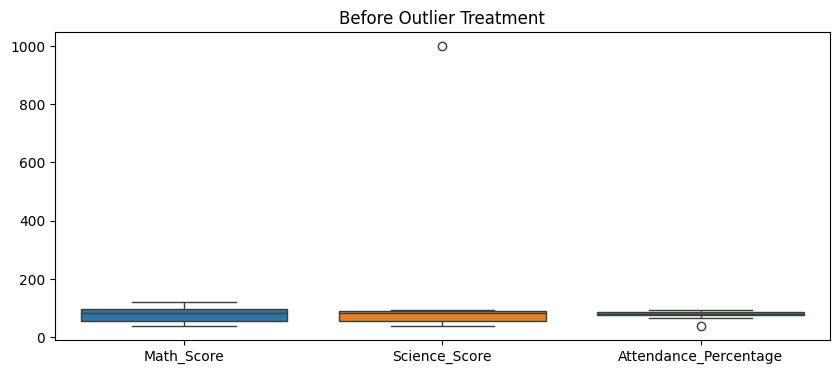

In [7]:
# Boxplot before outlier treatment
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Math_Score', 'Science_Score', 'Attendance_Percentage']])
plt.title("Before Outlier Treatment")
plt.show()

In [15]:
# IQR method to handle outliers
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper, upper, df[column])
    df[column] = np.where(df[column] < lower, lower, df[column])

remove_outliers('Math_Score')
remove_outliers('Science_Score')

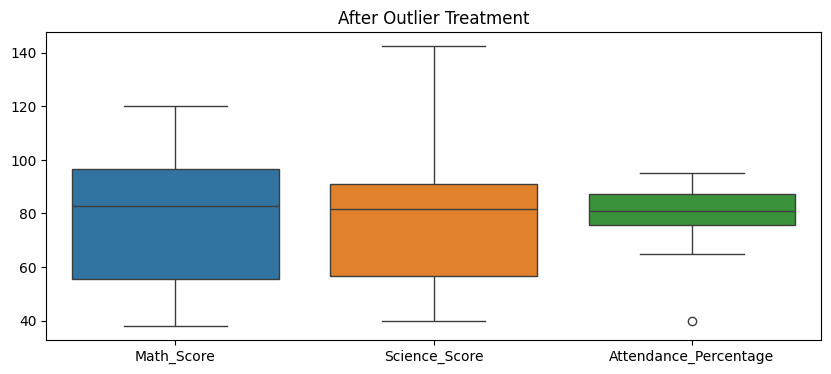

In [9]:
# Boxplot after outlier treatment
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Math_Score', 'Science_Score', 'Attendance_Percentage']])
plt.title("After Outlier Treatment")
plt.show()


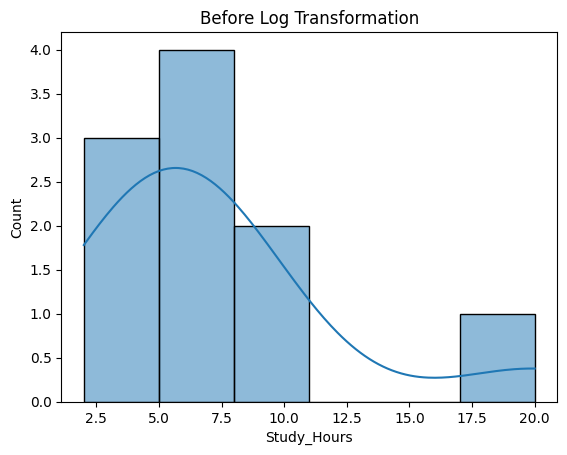

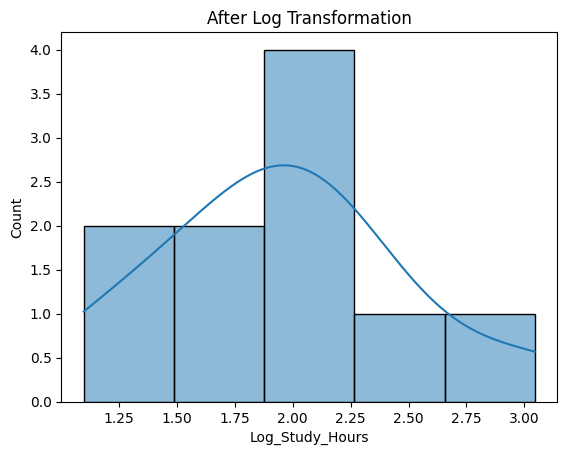

In [10]:
# Log transformation of Study_Hours
sns.histplot(df['Study_Hours'], kde=True)
plt.title("Before Log Transformation")
plt.show()

df['Log_Study_Hours'] = np.log1p(df['Study_Hours'])

sns.histplot(df['Log_Study_Hours'], kde=True)
plt.title("After Log Transformation")
plt.show()

In [11]:
# Final dataset
print("\nFinal Cleaned and Transformed Data:")
print(df)


Final Cleaned and Transformed Data:
   Student_ID  Math_Score  Science_Score  Attendance_Percentage  Study_Hours  \
0           1   88.000000         78.000                     90          5.0   
1           2   92.000000         85.000                     85          6.0   
2           3   77.777778         88.000                     88          6.5   
3           4   45.000000         45.000                     95          7.0   
4           5   67.000000         62.000                     75          4.0   
5           6  100.000000         95.000                     65          3.0   
6           7   98.000000         92.000                     80          2.0   
7           8   38.000000         40.000                     78          8.0   
8           9   52.000000         55.000                     82         10.0   
9          10  120.000000        142.375                     40         20.0   

   Log_Study_Hours  
0         1.791759  
1         1.945910  
2         2.014903 